# Lotka-Volterra model

In [2]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from scipy.integrate import solve_ivp

The Lotka-Volterra equations, also known as the predator-prey equations,
are a pair of first-order, non-linear,differential equations frequently used to
describe the dynamics of biological systems in which two species interact,
one as a predator and the other as prey.
The populations change through time according to the pair of equations.

The equations are as follows:

1. **Prey equation**:
   $$
   \frac{dx}{dt} = \alpha x - \beta xy
   $$
   where $\mathbf{x}$ is the prey population density (for example, the number of prey per square kilometrer) , $\boldsymbol{\alpha}$ is the growth rate of the prey, $\mathbf{y}$ is the predator population density, and $\boldsymbol{\beta}$ is the rate at which predators destroy prey.

2. **Predator equation**:
   $$
   \frac{dy}{dt} = \delta xy - \gamma y
   $$
   where $\mathbf{y}$ is the predator population, $\boldsymbol{\delta}$ is the rate at which predators increase by consuming prey, and $\boldsymbol{\gamma}$ is the mortality rate of the predators.


${\tfrac {dy}{dt}} \quad \text{and} \quad {\tfrac {dx}{dt}}$ represent the instantaneous growth rates of the two populations where $t$ represents time.


#### Parameters Description:
- **Prey's parameters**:
  - $\alpha$: the maximum prey per capita growth rate.
  - $\beta$: the effect of the presence of predators on the prey death rate.
- **Predator's parameters**:
  - $\gamma$: the predator's per capita death rate.
  - $\delta$: the effect of the presence of prey on the predator's growth rate.

$\alpha$, $\beta$, $\gamma$, $\delta$ > 0

## Example of numerical solution for: $\alpha = 2$, $\beta = 5$, $\gamma = 0.2$, $\delta = 0.6$

In [3]:
# Initial condition
x0 = 10
y0 = 10
z0 = [x0, y0]

# define time
t_span = (0, 100)

# define parameters
a = 2
b = 0.5
c = 0.2
d = 0.6

def lotkavolterra(t, z, a, b, c, d):
    x, y = z
    return [a*x - b*x*y, -c*y + d*x*y]

In [5]:
sol = solve_ivp(lotkavolterra, t_span, z0, args=(a, b, c, d), dense_output=False, max_step=0.01)

In [6]:
df = pd.DataFrame({
    'Time': sol.t,
    'x': sol.y[0],
    'y': sol.y[1]
})

print(df.head()) 

   Time          x          y
0  0.00  10.000000  10.000000
1  0.01   9.690273  10.587409
2  0.02   9.362283  11.187889
3  0.03   9.018036  11.798594
4  0.04   8.659798  12.416426


## Plots of the solutions

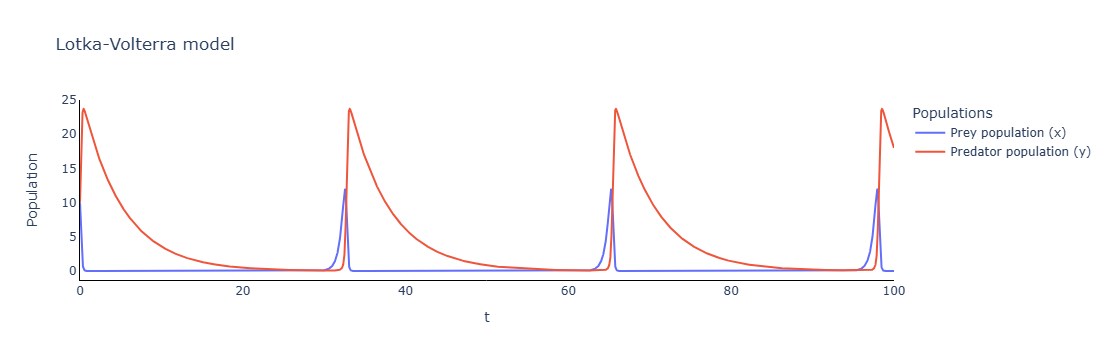

In [7]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=sol.t, y=sol.y[0], mode='lines', name='Prey population (x)'))
fig.add_trace(go.Scatter(x=sol.t, y=sol.y[1], mode='lines', name='Predator population (y)'))

fig.update_layout(
    title='Lotka-Volterra model',
    xaxis_title='t',
    yaxis_title='Population',
    legend_title='Populations',
    plot_bgcolor='white',  
    xaxis=dict(
        showgrid=False,  
        linecolor='black'  
    ),
    yaxis=dict(
        showgrid=False, 
        linecolor='black'  
    )
)

fig.show()

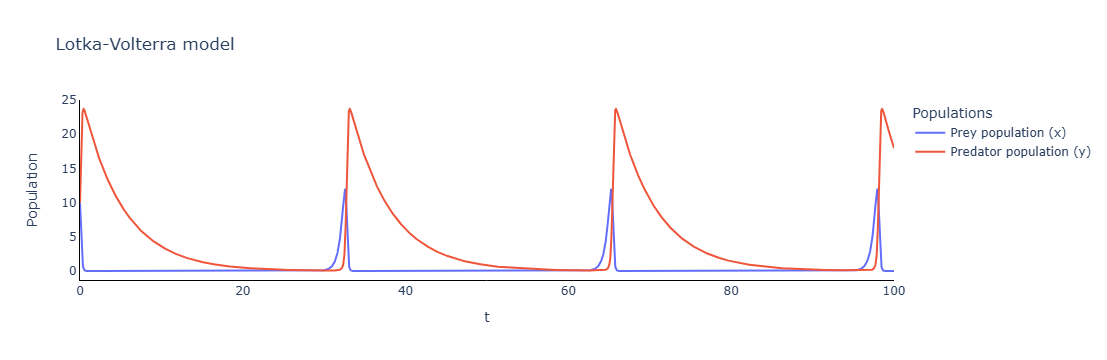

## Phase space

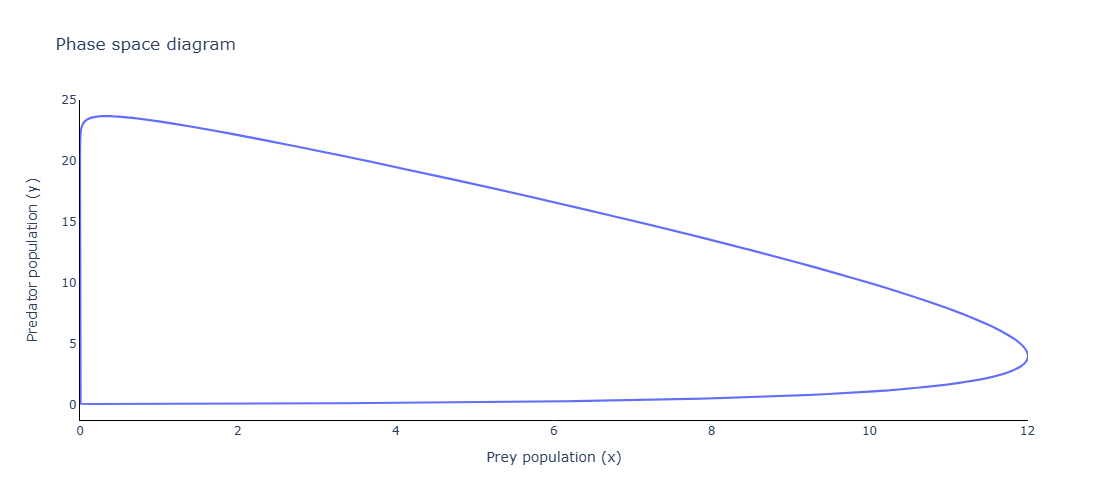

In [6]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=sol.y[0], y=sol.y[1], mode='lines', name='Phase space'))

fig.update_layout(
    title='Phase space diagram',
    xaxis_title='Prey population (x)',
    yaxis_title='Predator population (y)',
    plot_bgcolor='white',
    xaxis=dict(showgrid=False, linecolor='black'),
    yaxis=dict(showgrid=False, linecolor='black'),
    width=500,  
    height=500  
)

fig.show()

## Fixed points, linearization and stability

### Linearized System

Consider the system

$$
\dot{x} = f(x, y),
$$
$$
\dot{y} = g(x, y),
$$

and suppose that $z^* = (x^*, y^*)$ is a fixed point, i.e.,

$$
f(x^*, y^*) = 0, \quad g(x^*, y^*) = 0.
$$

Let

$$
u = x - x^*, \quad v = y - y^*
$$

denote the components of a small disturbance from the fixed point. To see whether the disturbance grows or decays, we need to derive differential equations for $u$ and $v$. Let’s do the $u$-equation first:

$$
\dot{u} = \dot{x} = f(x, y) \quad \text{(since } x^* \text{ is a constant)}
$$

$$
= f(x^* + u, y^* + v) \quad \text{(by substitution)}
$$
$$
\approx f(x^*, y^*) + u \frac{\partial f}{\partial x}|_{z^*} + v \frac{\partial f}{\partial y}|_{z^*} + O(u^2, v^2, uv) \quad \text{(Taylor series expansion)}
$$
$$
= u \frac{\partial f}{\partial x}|_{z^*}  + v \frac{\partial f}{\partial y}|_{z^*}  + O(u^2, v^2, uv) \quad \text{(since } f(x^*, y^*) = 0).
$$

Similarly we find:
$$
\dot{v} = u\frac{\partial g}{\partial x}|_{z^*} + v\frac{\partial g}{\partial y}|_{z^*} + O(u^2, v^2, uv)
$$

Hence the disturbance $(u, v)$ evolves according to the matrix equation:

$$
\begin{pmatrix}
\dot{u} \\
\dot{v}
\end{pmatrix}
=
\begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}_{z^*}
\begin{pmatrix}
u \\
v
\end{pmatrix}
+ \text{quadratic terms.} 
$$
The matrix 

$$
A = \begin{pmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{pmatrix}_{z^*}
$$

is called the Community matrix (the Jacobian matrix at the fixed point $z^*$).

### Stability

To determine the stability of a fixed point we need to find the eginvalues of $A$.

The general solution for $\mathbf{I}(t) = \begin{pmatrix} u \\ v \end{pmatrix}$ after linearization is given by:

$\mathbf{I}(t) = c_1 e^{\lambda_1 t}\mathbf{v_1} + c_2 e^{\lambda_2 t}\mathbf{v_2}$

where $c_1$ and $c_2$ are constants, $\lambda_1$ and $\lambda_2$ are the eginvalues of the matrix $A$ and $\mathbf{v_1}$  and $\mathbf{v_2}$ are the corresponding eginvectors.

#### Trace and Determinant

The eigenvalues of an arbitrary matrix $A$ are the solutions of the characteristic equation. Consider the matrix $A$:

$$
A = \begin{pmatrix}
p & q \\
r & s
\end{pmatrix}
$$

The characteristic equation is 

$$
\text{det}(A - \lambda I) = (p - \lambda)(s - \lambda) - rq
$$

Expanding this determinant gives the characteristic polynomial:

$$
\lambda^2 - \lambda(p + s) + (ps - rq) = 0
$$

Defining the "trace" of the matrix as $\text{tr} = p + s$ and the "determinant" as $\text{det} = ps - rq$, the characteristic equation simplifies into:

$$
\lambda^2 - \text{tr} \lambda + \text{det} = 0 
$$

The solutions to this quadratic equation, often referred to as the eigenvalues, are given by:

$$
\lambda_{\pm} = \frac{\text{tr} \pm \sqrt{\text{tr}^2 - 4 \text{det}}}{2}
$$

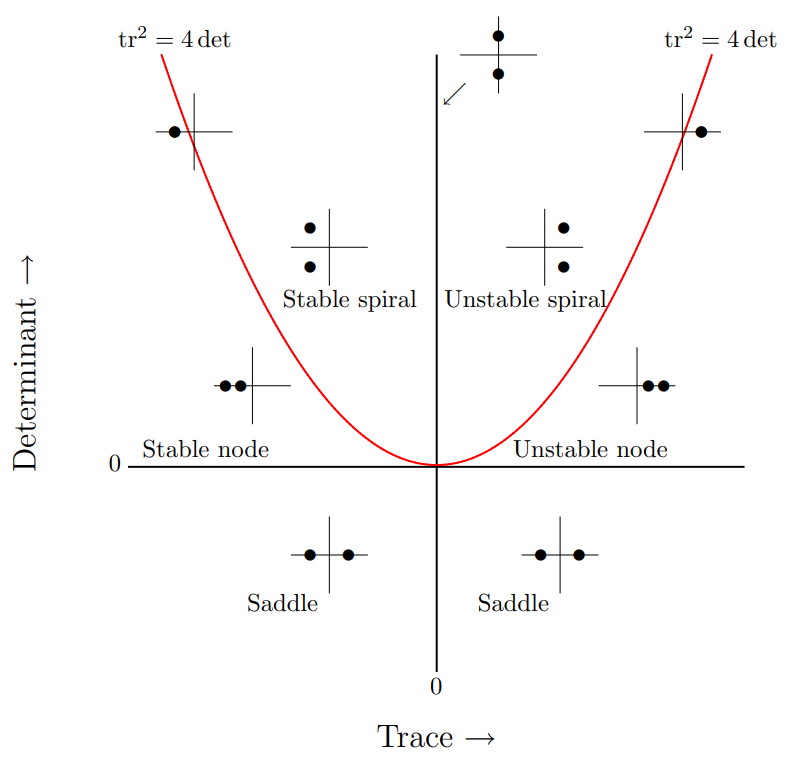

A simple condition for stability is

$\text{tr} < 0$ and $\text{det} > 0$

## Example 1 - Lotka-Volterra equations

Population equilibrium occurs in the model when both of the derivatives are equal to 0:

$$
x(\alpha - \beta y) = 0,
$$

$$
-y(\gamma - \delta x) = 0.
$$

The above system of equations yields two solutions:

$$
z_1^* = \{y = 0, \ x = 0\}
$$

$$
z_2^* = \left\{y = \frac{\alpha}{\beta}, \ x = \frac{\gamma}{\delta}\right\}.
$$

Hence, there are two equilibria.

To determaine the stability, we find the Jaccobian matrix:

$$
J(x,y) = \begin{bmatrix}
\alpha - \beta y & -\beta x \\
\delta y & \delta x - \gamma
\end{bmatrix},
$$

When evaluated at the steady state of $(0, 0)$, the Jacobian matrix $J$ becomes

$$
J(0,0) = \begin{bmatrix}
\alpha & 0 \\
0 & -\gamma
\end{bmatrix}.
$$

So we get

$$
\text{det} = -\gamma\alpha, \quad \text{tr} = -\gamma + \alpha.
$$

Hence, the fixed point at the origin is a $\textbf{saddle point}$.

Evaluating the Jacobian at the second fixed point leads to

$$
J\left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right) = \begin{bmatrix}
0 & -\frac{\beta \gamma}{\delta} \\
\frac{\alpha \delta}{\beta} & 0
\end{bmatrix}.
$$

So we get

$$
\text{det} = \gamma\alpha, \quad \text{tr} = 0.
$$

Hence, the fixed point is a $\textbf{center}$, suggesting periodic behavior in the system.

## Phase portrait diagram

To sketch the phase portrait, it is helpful to plot the nullclines, defined as the curves where either $\frac{dx}{dt} = 0$ or $\frac{dy}{dt} = 0$. 

In the case of Lotka-Volterra equations we get:

1. **Prey Nullcline** ($\frac{dx}{dt} = 0$):
   - $x = 0$
   - $y = \frac{\alpha}{\beta}$
3. **Predator Nullcline** ($\frac{dy}{dt} = 0$):
   - $y = 0$
   - $x = \frac{\gamma}{\delta}$

These nullclines are crucial for understanding where the system's flow is purely horizontal or vertical, indicating equilibrium states where the growth rate of one population does not change.

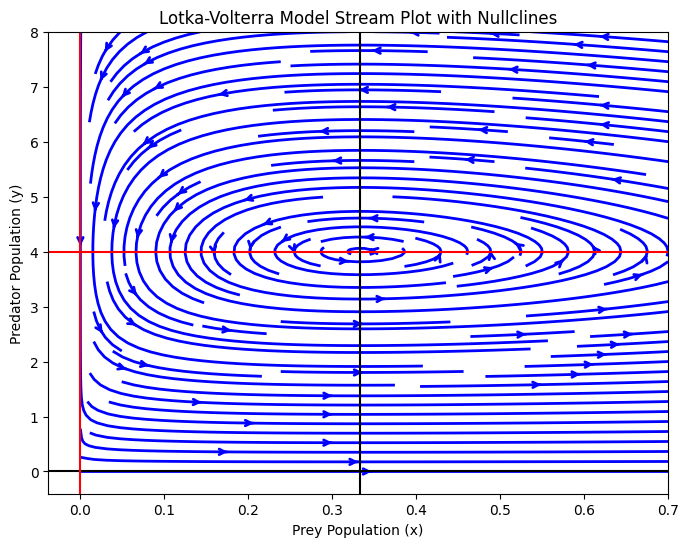

In [7]:
x_values = np.linspace(0, 0.7, 15)
y_values = np.linspace(0, 8, 15)
X, Y = np.meshgrid(x_values, y_values)
Z = lotkavolterra(0, [X, Y], a, b, c, d)

fig, ax = plt.subplots(figsize=(8, 6))
ax.streamplot(X, Y, Z[0], Z[1], color='b', linewidth=2, density=1.5, arrowstyle='->')

ax.axhline(y=a/b, color='red', linestyle='-')
ax.axvline(x=c/d, color='black', linestyle='-')
ax.axhline(y=0, color='black', linestyle='-')
ax.axvline(x=0, color='red', linestyle='-')

ax.set_xlabel('Prey Population (x)')
ax.set_ylabel('Predator Population (y)')
ax.set_title('Lotka-Volterra Model Stream Plot with Nullclines')

plt.show()

## Example 2 - Lotka-Volterra equations with carrying capacity 

1. **Prey Population Equation**:
   $$
   \frac{dR}{dt} = aR - \frac{a}{K} R^2 - cRN
   $$
   where:
   - $R$ is the prey population.
   - $a$ is the natural growth rate of the prey.
   - $K$ is the carrying capacity of the environment for the prey.
   - $c$ is the rate at which predation affects the prey population.

2. **Predator Population Equation**:
   $$
   \frac{dN}{dt} = dRN - eN
   $$
   where:
   - $N$ is the predator population.
   - $d$ is the growth rate of the predator population dependent on the prey availability.
   - $e$ is the natural death rate of the predators.

Population equilibrium occurs in the model when both of the derivatives are equal to $0$:

$$
aR - \frac{a}{K} R^2 - cRN = 0
$$

$$
N(dR - e) = 0.
$$

The above system of equations yields two solutions:

$$
z_1^* = \{R = 0, \ N = 0\}
$$

$$
z_2^* = \{R = K, \ N = 0 \}
$$

$$
z_3^* = \left\{R = \frac{e}{d}, \ N = \frac{a}{c}(1-\frac{e}{Kd})\right\}.
$$

Hence, there are three equilibria.

The Jaccobian matrix:

$$
J(N,R) = \begin{bmatrix}
a - \frac{2a}{K}R -cN & -cR \\
dN & dR - e
\end{bmatrix}
$$

When evaluated at the steady state of $(0, 0)$, the Jacobian matrix $J$ becomes

$$
J(0,0) = \begin{bmatrix}
a & 0 \\
0 & -e
\end{bmatrix}.
$$

So we get

$$
\text{det} = -e\alpha, \quad \text{tr} = -e + \alpha.
$$

Hence, the fixed point at the origin is a $\textbf{saddle point}$.

Evaluating the Jacobian at the second fixed point leads to

$$
J\left(K, 0\right) = \begin{bmatrix}
-a & -cK \\
0 & dK-e
\end{bmatrix}.
$$

So we get

$$
\text{det} = ae-adK, \quad \text{tr} = dK-e-a.
$$

Hence, the condition for stability is $K < \frac{e}{d}$ ($\text{tr} < 0$ for this condition).

For the last fixed point we get

$$
J\left(\frac{e}{d}, \frac{a}{c}(1-\frac{e}{Kd})\right) = \begin{bmatrix}
-\frac{ae}{kd} & -c\frac{e}{d} \\
\frac{da}{c}(1-\frac{e}{kd}) & 0
\end{bmatrix}.
$$

So we get

$$
\text{det} = ae(1-\frac{e}{kd}), \quad \text{tr} = -\frac{ae}{kd}.
$$

Hence, the condition for stability is $K > \frac{e}{d}$.

## Phase portrait diagram

Phase portrait diagram is a graphical method to analyze a model.

1. **Prey Nullcline** ($\frac{dR}{dt} = 0$):
   - $R = 0$
   - $N = \frac{a}{c}(1-\frac{1}{k}R)$
3. **Predator Nullcline** ($\frac{dN}{dt} = 0$):
   - $N = 0$
   - $R = \frac{e}{d}$

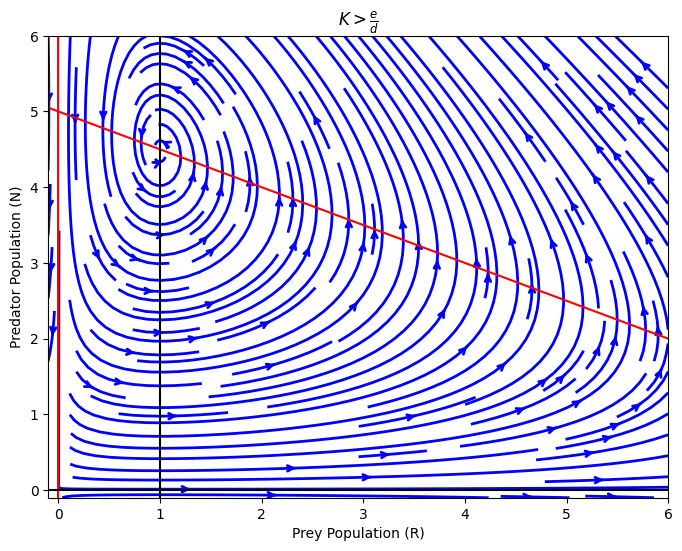

In [13]:
# parameters
a, K, c, d, e = 1, 10, 0.2, 0.2, 0.2

# equations
def equations(z, a, K, c, d, e):
    R, N = z
    return [a*R - a/K*R**2 - c*R*N, -e*N + d*R*N]

x_values = np.linspace(-0.1, 6, 15)
y_values = np.linspace(-0.1, 6, 15)
X, Y = np.meshgrid(x_values, y_values)
Z = equations([X, Y], a, K, c, d, e)

fig, ax = plt.subplots(figsize=(8, 6))
ax.streamplot(X, Y, Z[0], Z[1], color='b', linewidth=2, density=1.5, arrowstyle='->')

# prey nullclines
ax.axvline(x=0, color='red', linestyle='-')
ax.plot(x_values, a/c * (1 - 1/K * x_values), color='red')

# predator nullclines
ax.axvline(x=e/d, color='black', linestyle='-')
ax.axhline(y=0, color='black', linestyle='-')

ax.set_xlabel('Prey Population (R)')
ax.set_ylabel('Predator Population (N)')
ax.set_title(r'$K > \frac{e}{d}$')

plt.show()